# Problem Definition

HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [69]:
# Import required lobraries
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
init_notebook_mode(connected = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

# Data Analysis   (EDA)

In [70]:
df= pd.read_csv('HR_Attrition.csv')

In [71]:
pd.set_option('max_columns', None)

In [72]:
pd.set_option('max_rows',None)

In [73]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [74]:
df.shape

(1470, 35)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [77]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [78]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in the dataset. So, we don't have to preprocess the dataset.



Finding out unique values for some columns

In [79]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

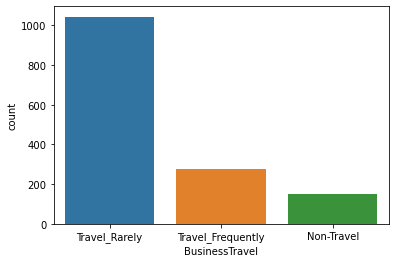

In [80]:
sns.countplot('BusinessTravel',data=df)

In [81]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [82]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

<AxesSubplot:xlabel='Department', ylabel='count'>

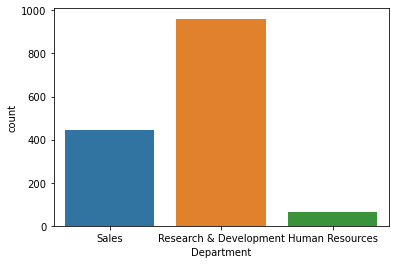

In [83]:
sns.countplot('Department',data=df)

In [84]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [85]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

<AxesSubplot:xlabel='EducationField', ylabel='count'>

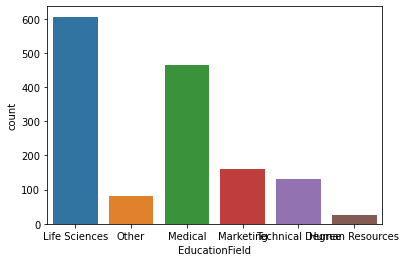

In [86]:
sns.countplot('EducationField',data=df)

In [87]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [88]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

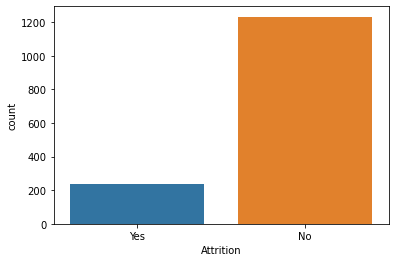

In [89]:
sns.countplot('Attrition',data=df)

In [90]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [91]:
df['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

<AxesSubplot:xlabel='Education', ylabel='count'>

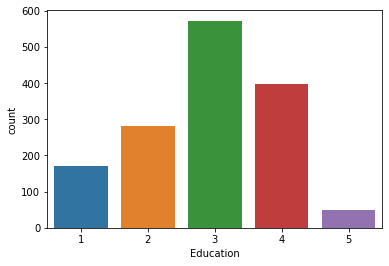

In [92]:
sns.countplot('Education',data=df)

In [93]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

<AxesSubplot:xlabel='EducationField', ylabel='Education'>

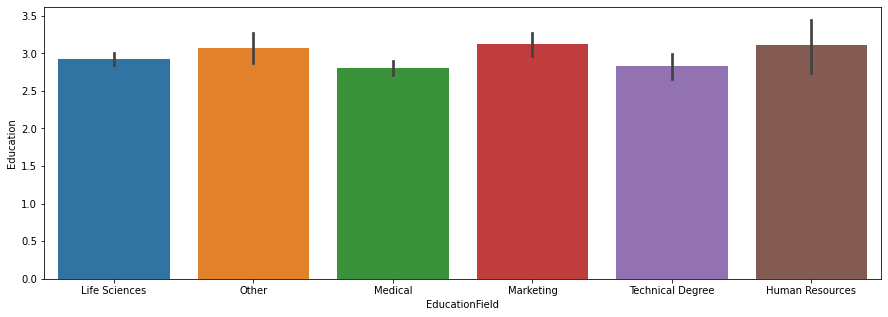

In [94]:
plt.figure(figsize=(15,5))
sns.barplot(x='EducationField',y='Education', data=df)

# Pre-Processing Pipeline

Showing individual values of each columns using histplot

Pairplot Of All Varaibles

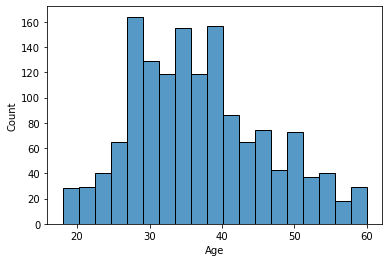

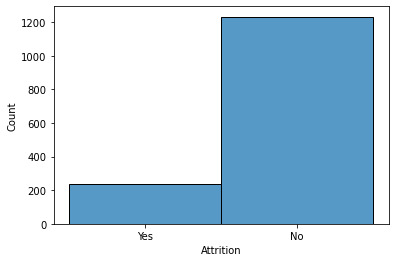

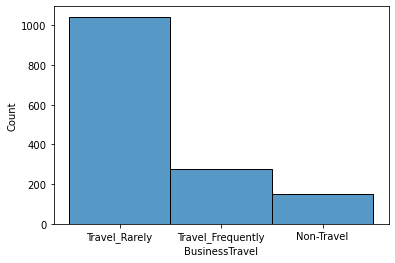

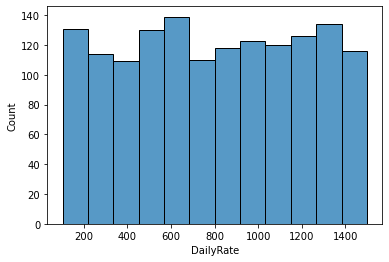

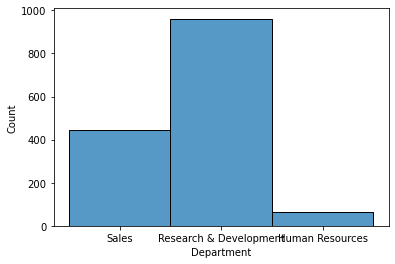

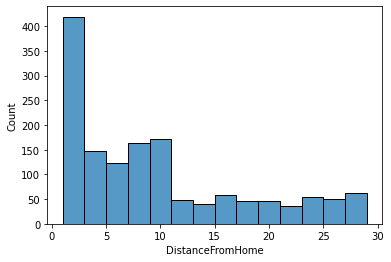

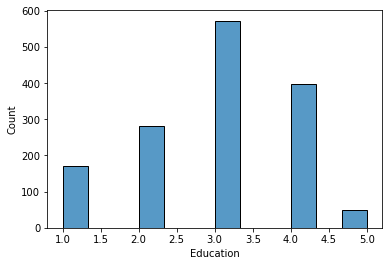

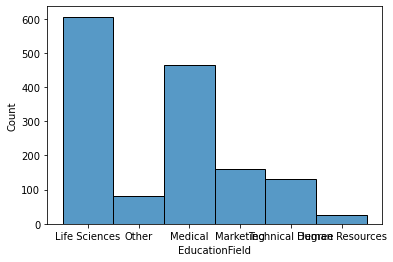

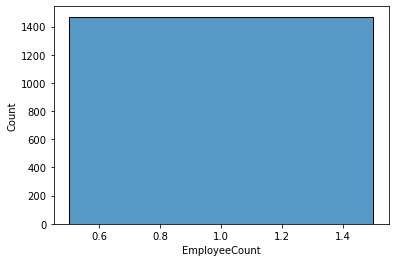

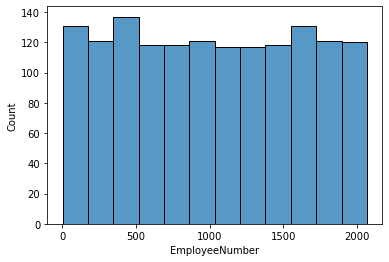

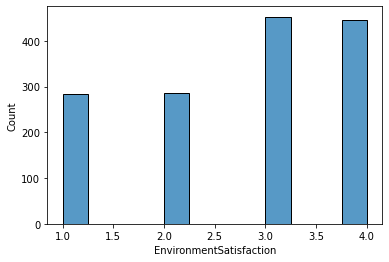

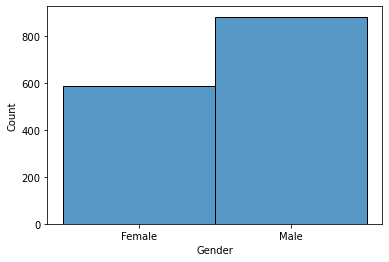

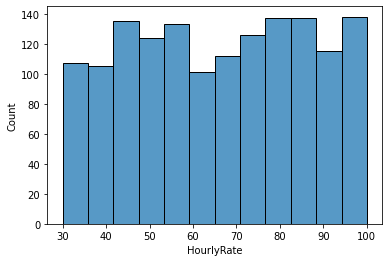

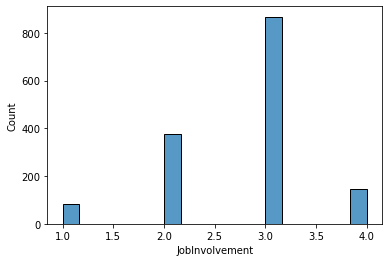

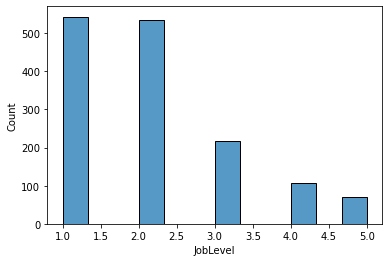

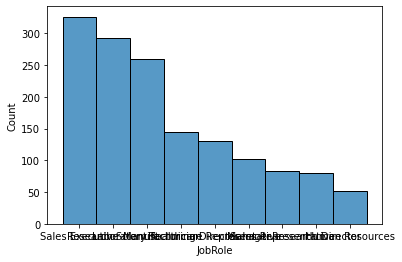

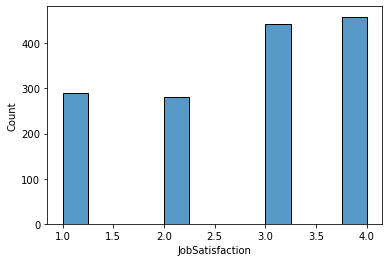

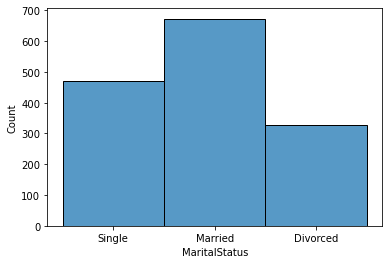

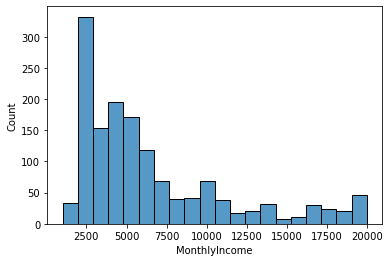

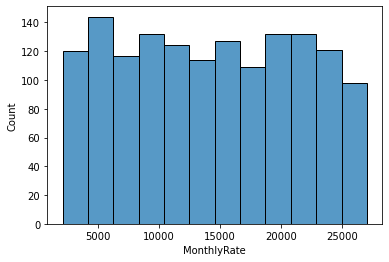

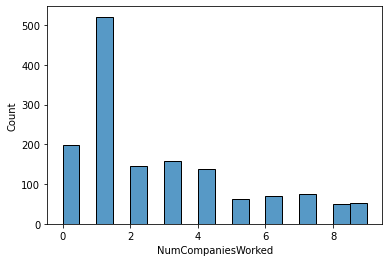

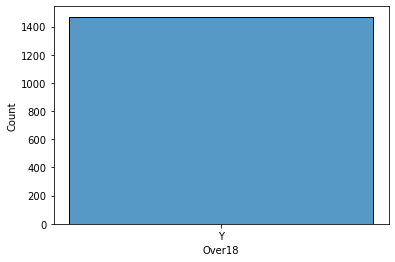

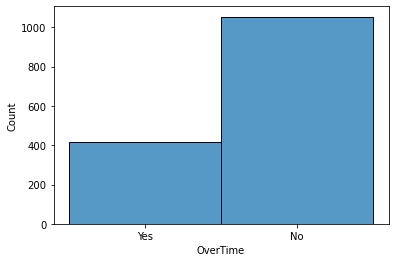

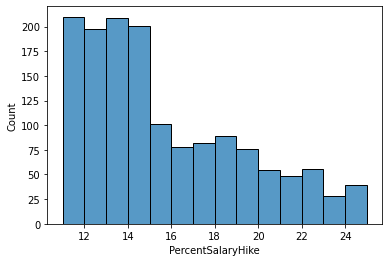

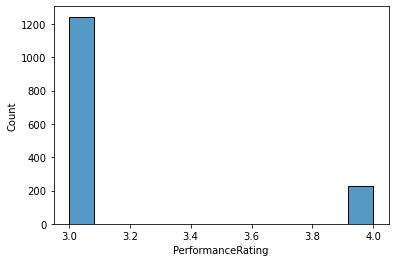

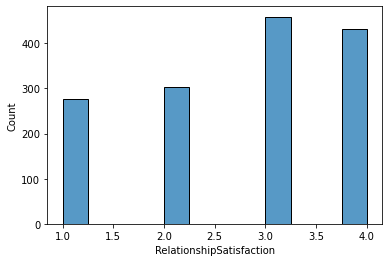

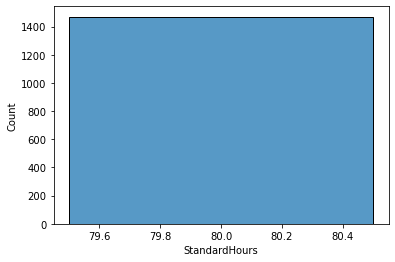

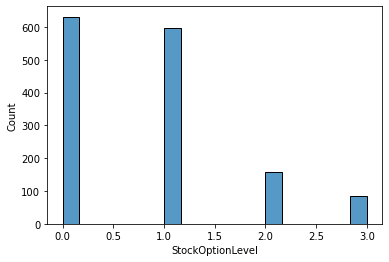

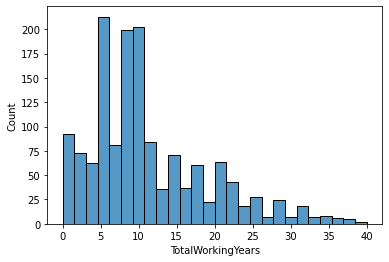

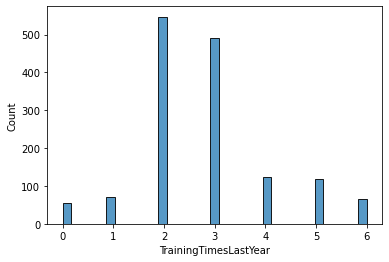

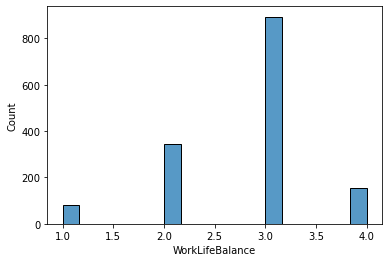

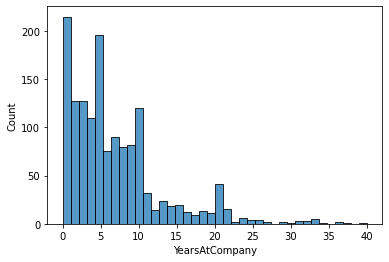

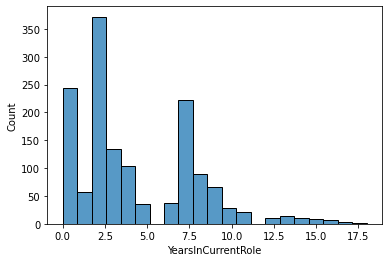

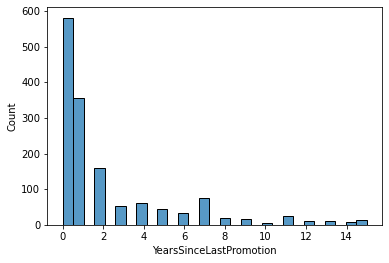

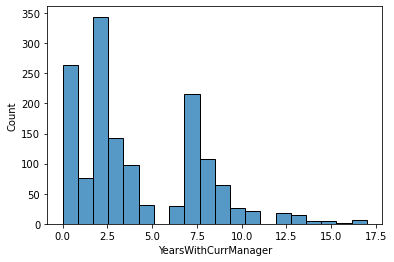

In [95]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

Label Encoding for Attrition Column

In [96]:
le = LabelEncoder()
le.fit(df['Attrition'])
df['Attrition'] = le.transform(df['Attrition'])

In [97]:
a = []
b = [df['EducationField'].unique()]
for i in df['EducationField'].unique():
    a.append((df[(df['EducationField']==i) & (df['Attrition'] == 1)].shape[0]/df[df['EducationField']==i].shape[0])*100)
pd.DataFrame(a,b, columns = ['Attrition percentage by Education Field'])

,Attrition percentage by Education Field
Life Sciences,14.686469
Other,13.414634
Medical,13.577586
Marketing,22.012579
Technical Degree,24.242424
Human Resources,25.925926


The above data shows attrition percentage w.r.t Educational fields 

In [98]:
df1 = df[df['Attrition'] == 1] 
abc = (df1.groupby('WorkLifeBalance').agg('count')['Attrition']/df.groupby('WorkLifeBalance').agg('count')['Attrition']) * 100
fig = px.bar(x = abc.index, y = abc.values, labels={'x': 'Work Life Balance', 'y' : 'Count'})
fig.show()

Employees who have a work life balance = 1 tend to leave the company very soon when compared to other employees.

<AxesSubplot:ylabel='Attrition'>

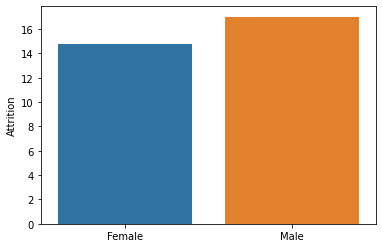

In [99]:
cks = ['Female','Male']
abc = ((df[df['Attrition'] == 1].groupby('Gender').agg('count'))/(df.groupby('Gender').agg('count')) *100)['Attrition']
sns.barplot(cks,abc)

Most people having a MonthlyIncome between 2000-2999 are likely to leave the company and as the salary range increases the attrition rate decreases.

In [100]:
fig1 = px.histogram(df,x = 'HourlyRate')
fig1.show()

The Average Hourly rate of most of the employees is between 30-99 whereas only 19 employees get an hourly rate of 100-104.

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

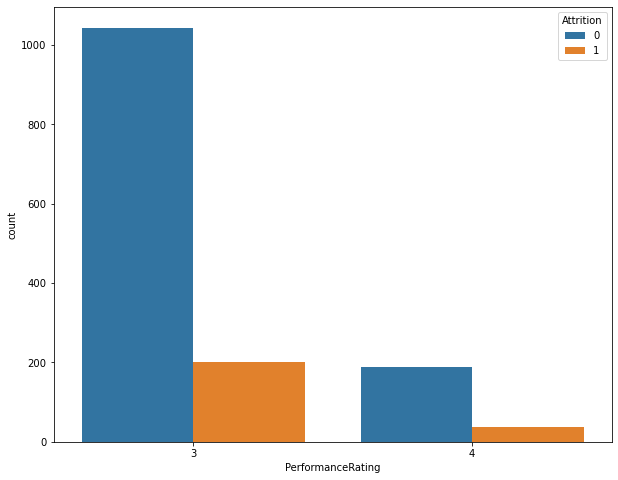

In [101]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'PerformanceRating', hue = 'Attrition', data = df)

Employees who have a performance rating - 3 are more likely to be leaving the company when compared to performance rating - 4.

In [102]:
df_Attr_Yes = df[df['Attrition'] == 1]
abc = df_Attr_Yes['JobSatisfaction'].value_counts()/df['JobSatisfaction'].value_counts() * 100
fig = px.bar(x = abc.index, y = abc.values)
fig.show()

Employees with the least JobSatisfaction = 1 has the highest possibility of leaving the company.

In [103]:
fig2 = px.histogram(df[df['Attrition'] == 1], x = 'PercentSalaryHike', color = 'Attrition')
fig2.show()

The histogram of the percent salary hike for the employees whose Attrition == 'Yes' is plotted above and it shows that as the percent salary hike increases the attrition count decreases. This shows that employees who are not satisfied with the salary percent hike tend to leave the company.

In [104]:
fig3 = px.pie(df[df['Attrition'] == 1],values = 'Attrition', names = 'Department',title = 'Attrition by Department')
fig3.show()

Attrition is mostly in the Reasearch & Development department and the least in the Human Resources department.

In [105]:
for col in df.columns[2:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <=2:
            print(col)

Gender
Over18
OverTime


Label encoding the Gender and OverTime variables as they have only 2 unique values

In [106]:
df['Gender'] = le.fit_transform(df['Gender'])
df['OverTime'] = le.fit_transform(df['OverTime'])

In [107]:
df.drop(columns = 'Over18',inplace = True)

We can drop the Over18 column since it has only one unique value and won't add value to the machine learning model.

In [108]:
df = pd.get_dummies(df,drop_first = True)

In [109]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

We scale the whole dataset using StandardScaler to have all the features in a common scale while building a machine learning model.

# EDA Concluding Remarks

The age of the employees ranges from 18 to 60.
Monthly Income of the employees range between 0 to 5000.
The Number of companies most of the employees had worked previously is between 1 to 2.
More than 400 employees have a work experience of in and around 10 years.

# Building Machine Learning Models

In [110]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [111]:
y = df.loc[:,'Attrition']

In [112]:
X = df.drop('Attrition', axis = 1)

In [113]:
X.shape

(1470, 47)

In [114]:
y.shape

(1470,)

In [115]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [116]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)
print('Shape of X_train {}'.format(X_train.shape))
print('Shape of X_test {}'.format(X_test.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of y_test {}'.format(y_test.shape))

Shape of X_train (1029, 47)
Shape of X_test (441, 47)
Shape of y_train (1029,)
Shape of y_test (441,)


In [118]:
error_rate = []
for i in range(1,40):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    error_rate.append(np.mean(y_test != y_pred))

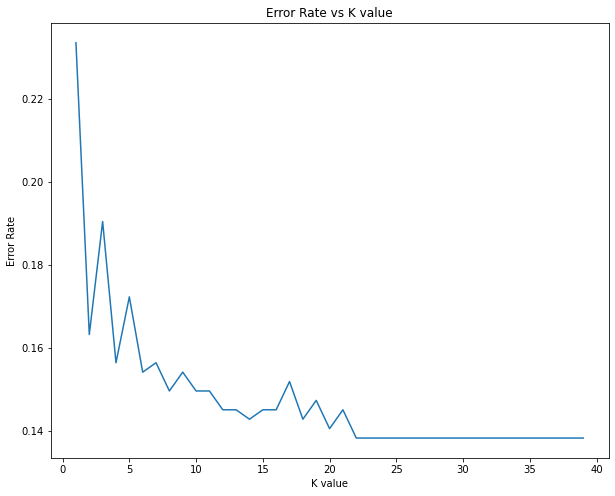

In [119]:
plt.figure(figsize = (10,8))
plt.plot(range(1,40),error_rate)
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K value')
plt.show()

In [120]:
models = [LogisticRegression(max_iter=1200000, dual = False), RandomForestClassifier(), SVC(gamma = 'auto'), DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier(n_neighbors = 22)]
model_names = ['Logistic Regression', 'Random Forest Classifier', 'SVC','Decision Tree Classifier', 'Naive Bayes','KNeigbors Classifier']
f1_score_ = []
roc_auc = []
overall = []
for i,j in zip(model_names,models):
    clf = j
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_score_ =  f1_score(y_test,y_pred) * 100
    roc_auc = roc_auc_score(y_test,y_pred) * 100
    overall.append([i,f1_score_,roc_auc])

In [121]:
ms = pd.DataFrame(overall, columns = ['Model Name','F1-Score','ROC AUC Score'])
ms

,Model Name,F1-Score,ROC AUC Score
0,Logistic Regression,51.020408,68.912856
1,Random Forest Classifier,16.666667,54.260138
2,SVC,0.000000,50.000000
3,Decision Tree Classifier,31.578947,60.502588
4,Naive Bayes,40.000000,69.173857
5,KNeigbors Classifier,0.000000,50.000000


Since the dataset is imbalanced we are not using the accuracy score instead F1-Score and ROC AUC Score.

Logistic Regression and Naive Bayes has the highest ROC AUC score so we can go for further analysis.

Fine Tuning for better accuracy of the model :

In [126]:
grid={'C': np.arange(1e-03, 2, 0.01)}
log_GS = GridSearchCV(LogisticRegression(solver='liblinear',
                                         class_weight="balanced", 
                                         random_state=7), param_grid = grid, verbose=True,return_train_score=True,scoring = 'roc_auc',  cv = 10 )
log_GS.fit(X_train,y_train)
print('Best Estimator : {}'.format(log_GS.best_estimator_))
print('Best Score : {}'.format(log_GS.best_score_))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best Estimator : LogisticRegression(C=1.2509999999999997, class_weight='balanced',
                   random_state=7, solver='liblinear')
Best Score : 0.8293240524664037


In [127]:
clf = LogisticRegression(C=1.9109999999999996, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [128]:
print('F1-Score',round(f1_score(y_test,y_pred)*100))
print('AUC ROC Score',round(roc_auc_score(y_test,y_pred)*100))

F1-Score 40
AUC ROC Score 69


# Concluding Remarks

29 out of 441 values have been predicted correctly as 0 and 1.

Since, Naive Bayes has no hyper-parameters to fine tune we donot use GridSearch CV for that.

Overall, after the fine tuning we see that Logistic Regression has the highest ROC AUC score when compared to any other algorithm.

Fields like Human Resources, Technical degree and Marketing has the high attrition percentage of 26%, 24% and 22%.So, the employees has to be introspected carefully to get to know their concerns.

Employees who have a job satisfaction = 1 has the highest attrition rate of 22.8% .

Research & Development department has the highest attrition percentage of 56.1%.

Employees who have a work life balance = 1 tend to leave the company very soon when compared to other employees.